<a href="https://colab.research.google.com/github/Edson-Alves-Git/Portif-lio/blob/main/An%C3%A1lise_Macro_Projeto_de_An%C3%A1lise_de_Dados_Infla%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""Perguntas

Como a inflação se comportou no Brasil? Resposta na Caixa de código número 10
Qual o período com menores e maiores taxas de inflação? Resposta: 2020
Qual o valor médio da inflação do Brasil e como é a distribuição de seus valores? Respota: 5.70%
O que afeta a inflação? Com qual variável ela se relaciona? Respota: Conforme vimos no gráfico a inflação tem um relação negativa com o desemprego. """

In [ ]:
# Importa as bibliotecas necessárias
# https://sidra.ibge.gov.br/home/

!pip install sidrapy
import sidrapy
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
#### Importação
# Índice Nacional de Preços ao Consumidor Amplo (IPCA) - Acumulado 12 meses - IBGE

ipca_raw = sidrapy.get_table(table_code = '1737',
                             territorial_level = '1',
                             ibge_territorial_code = 'all',
                             variable = '2265',
                             period = 'last%20472',
                             header='n')

In [ ]:
#### Importação
# Índice Nacional de Preços ao Consumidor Amplo (IPCA) - Acumulado 12 meses - IBGE
ipca_raw = sidrapy.get_table(table_code = '1737',
                             territorial_level = '1',
                             ibge_territorial_code = 'all',
                             variable = '2265',
                             period = 'last%20472',
                             header='n')

In [ ]:
ipca_raw

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,1,Brasil,2,%,222.43,1,Brasil,198509,setembro 1985,2265,IPCA - Variação acumulada em 12 meses
1,1,Brasil,2,%,222.95,1,Brasil,198510,outubro 1985,2265,IPCA - Variação acumulada em 12 meses
2,1,Brasil,2,%,233.02,1,Brasil,198511,novembro 1985,2265,IPCA - Variação acumulada em 12 meses
3,1,Brasil,2,%,242.23,1,Brasil,198512,dezembro 1985,2265,IPCA - Variação acumulada em 12 meses
4,1,Brasil,2,%,250.23,1,Brasil,198601,janeiro 1986,2265,IPCA - Variação acumulada em 12 meses
...,...,...,...,...,...,...,...,...,...,...,...
467,1,Brasil,2,%,4.24,1,Brasil,202408,agosto 2024,2265,IPCA - Variação acumulada em 12 meses
468,1,Brasil,2,%,4.42,1,Brasil,202409,setembro 2024,2265,IPCA - Variação acumulada em 12 meses
469,1,Brasil,2,%,4.76,1,Brasil,202410,outubro 2024,2265,IPCA - Variação acumulada em 12 meses
470,1,Brasil,2,%,4.87,1,Brasil,202411,novembro 2024,2265,IPCA - Variação acumulada em 12 meses


In [ ]:
# Realiza a limpeza e manipulação da tabela
ipca =  (
     ipca_raw
    .loc[0:,['V', 'D2C']]
    .rename(columns = {'V': 'ipca',
                       'D2C': 'date'}
            )
      )
# Transforma a coluna date em tipo datetime
ipca['date'] = pd.to_datetime(ipca['date'],
                                format = "%Y%m")
# Transforma a coluna ipca em tipo float
ipca['ipca'] = ipca['ipca'].astype(float)
# Filtra os dados
ipca = ipca.loc[ipca.date > '2004-01-01']

In [ ]:
ipca.describe()

,ipca,date
count,251.000000,251
mean,5.703825,2014-07-01 19:30:21.513944320
min,1.880000,2004-02-01 00:00:00
25%,4.230000,2009-04-16 00:00:00
50%,5.450000,2014-07-01 00:00:00
75%,6.590000,2019-09-16 00:00:00
max,12.130000,2024-12-01 00:00:00
std,2.116148,NaN


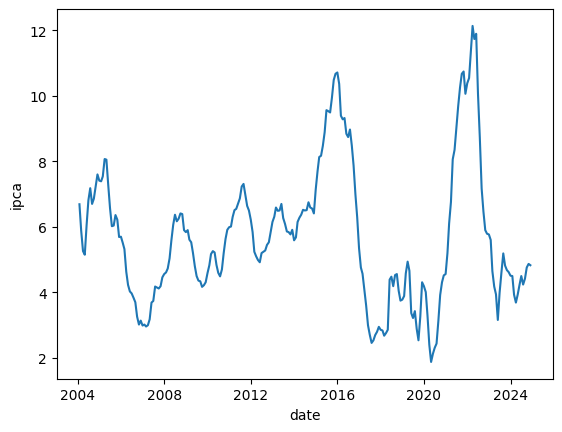

In [ ]:
# Gráfico de linha
ipca_linha = sns.lineplot(x = 'date',
             y = 'ipca',
             data = ipca)

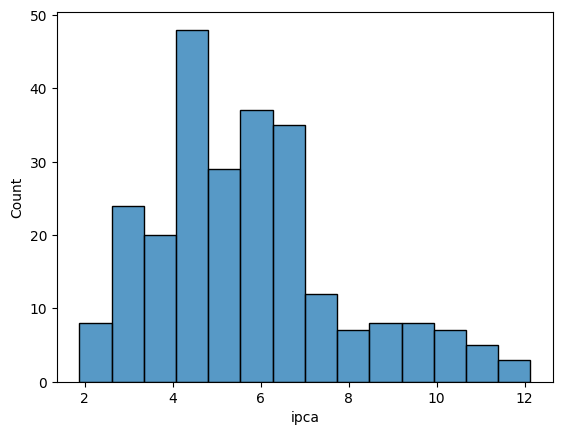

In [ ]:
# Gráfico de histograma do IPCA
ipca_hist = sns.histplot(x = 'ipca',
             data = ipca)

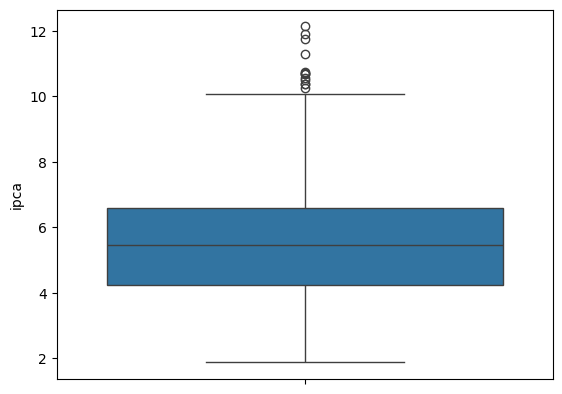

In [ ]:
# Gráfico de boxplot do IPCA
ipca_boxplot = sns.boxplot(y = 'ipca',
                            data = ipca)

In [ ]:
# Taxa de desocupação - % - PNADC-M/IBGE
desocupacao_raw = sidrapy.get_table(table_code= "6381",
                                    territorial_level = "1",
                                    ibge_territorial_code = "all",
                                    variable = "4099",
                                    period = "all",
                                    header ='n')
# Realiza a limpeza e manipulação da tabela
desocupacao =  (
     desocupacao_raw
    .loc[0:,['V', 'D2C']]
    .rename(columns = {'V': 'desocupacao',
                       'D2C': 'date',}
            )
      )
# Transforma a coluna date em tipo datetime
desocupacao['date'] = pd.to_datetime(desocupacao['date'],
                                format = "%Y%m")
# Transforma a coluna ipca em tipo float
desocupacao['desocupacao'] = desocupacao['desocupacao'].astype(float)
# Filtra os dados
desocupacao = desocupacao.loc[desocupacao.date > '2004-01-01']
# Junta os dados
df_dados = pd.merge(ipca, desocupacao, on = 'date')

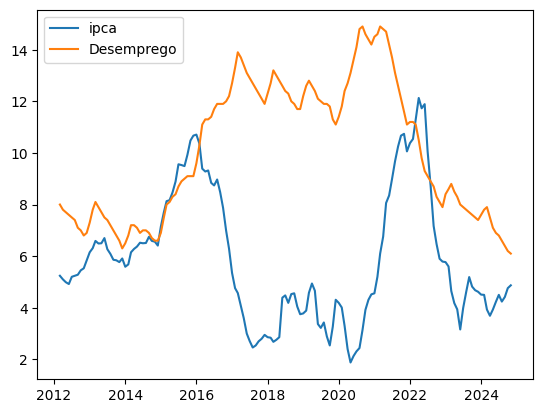

In [ ]:
## Gráfico
plt.plot('date',
         'ipca',
         data = df_dados,
         label = 'ipca')
plt.plot('date',
         'desocupacao',
         data = df_dados,
         label = 'Desemprego')
plt.legend()

In [ ]:
import statsmodels.formula.api as smf
# Estima modelo ("ols" descreve o modelo e "fit" o estima)
modelo = smf.ols("ipca ~ desocupacao", data = df_dados).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ipca   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     4.598
Date:                Wed, 29 Jan 2025   Prob (F-statistic):             0.0336
Time:                        17:11:25   Log-Likelihood:                -354.18
No. Observations:                 153   AIC:                             712.4
Df Residuals:                     151   BIC:                             718.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.5077      0.784      9.572      0.000       5.958       9.057
desocupacao    -0.1615      0.075     -2.144      0.034      -0.310      -0.013
==============================================================================
Omnibus:                       16.803   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.659
Skew:                           0.860   Prob(JB):                     5.38e-05
Kurtosis:                       2.650   Cond. No.                         41.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

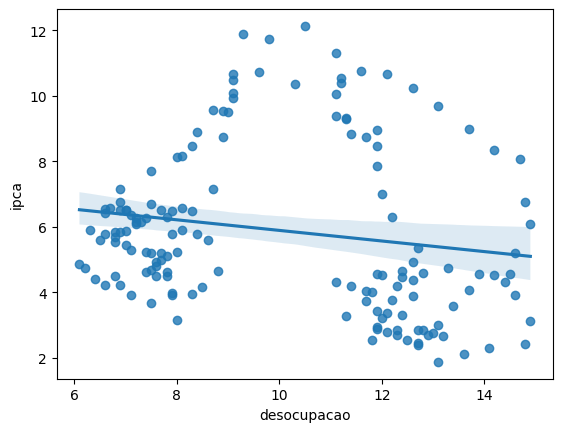

In [ ]:
dispersao = sns.regplot(x = 'desocupacao',
            y = 'ipca',
            data = df_dados)

In [ ]:
dispersao

<Axes: xlabel='desocupacao', ylabel='ipca'>